# Comparison between RS and WPM

In [1]:
from diffractio import plt, np
from diffractio import degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_fields_XZ import Scalar_field_XZ


**RS**

In [2]:
length = 150*um
wavelength = 1*um
x0 = np.linspace(-length/2, length/2, 1024)
z0 = np.linspace(2*um, 500*um, 512)

# source
f1 = Scalar_source_X(x0, wavelength)
f1.gauss_beam(A=1, x0=0*um, z0=0*um, w0=10*um, theta=0*degrees)

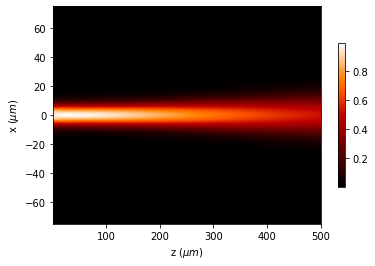

In [3]:
u_rs = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u_rs.incident_field(f1)
u_rs.RS()
u_rs.draw(kind='intensity', logarithm=False, colorbar_kind='vertical')


**WPM**

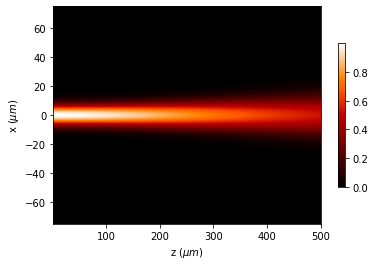

In [4]:
u_wpm = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u_wpm.incident_field(f1)
u_wpm.WPM(verbose=False)
u_wpm.draw(kind='intensity',
           logarithm=False,
           normalize='intensity',
           colorbar_kind='vertical')


**Differences**

Here we show the relative difference between BPM and RS

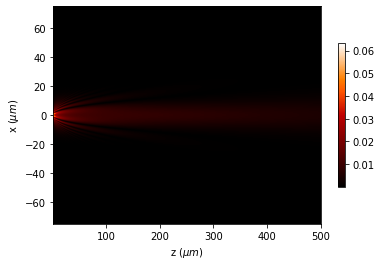

In [5]:
u_diff = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u_diff.u = np.sqrt(np.abs(np.abs(u_rs.u)**2 - np.abs(u_wpm.u)**2))
u_diff.draw(kind='intensity', logarithm=False, colorbar_kind='vertical')


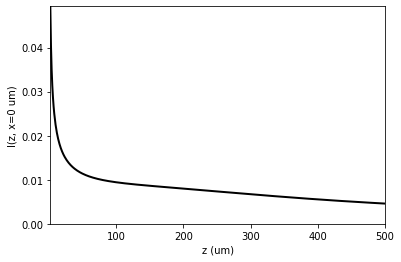

In [6]:
profile_error = u_diff.profile_longitudinal()
plt.ylim(ymin=0)